In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import nibabel as nb
from matplotlib import pyplot as plt
import numpy as np
img = nb.load("/content/drive/MyDrive/Data/Brain_Mat_file/image.nii")
DATA = np.array(img.dataobj)
# plt.imshow(DATA[0], cmap='gray')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
labels=[]
for i in range(708):
  labels.append(0)
for i in range(1426):
  labels.append(1)
for i in range(930):
  labels.append(2)
# labels =[]
# for i in range(708):
#   labels.append(0)
# for i in range(901):
#   labels.append(1)
# for i in range(930):
#   labels.append(2)
# len(labels)

In [7]:
print(DATA.shape)
print(len(labels))

(3064, 256, 256)
3064


In [8]:
np.unique(labels)

array([0, 1, 2])

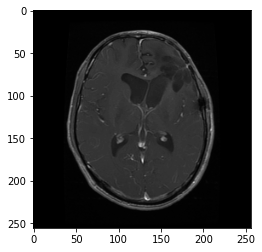

In [9]:
plt.imshow(DATA[1066],cmap='gray')

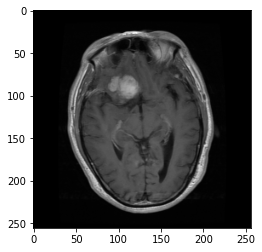

In [10]:
plt.imshow(DATA[5],cmap='gray')

In [13]:
# data=[]
# for i in range(len(DATA)):
#   if(i>1608 and i<2134):
#     continue
#   data.append(DATA[i])

# data=np.array(data)
labels=np.array(labels)
# data.shape,labels.shape

In [ ]:
# X_update=data.reshape(len(data),-1) #256*256=65536
# X_update.shape

(2539, 65536)

In [15]:
#Split Data
xtrain, xtest, ytrain, ytest= train_test_split(DATA,labels,random_state=10,test_size=.20)

In [16]:
xtrain.shape,xtest.shape

((2451, 256, 256), (613, 256, 256))

In [17]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/11073
xtest=xtest/10878
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

11073 0
10878 0
1.0 0.0
1.0 0.0


In [23]:
xtrain.shape

(2451, 256, 256)

In [24]:
X_train=X_train.reshape(len(X_train),-1) #256*256=65536
X_test=X_test.reshape(len(X_test),-1) #256*256=65536



In [22]:
X_train=np.array(xtrain)
Y_train=np.array(ytrain)
X_test=np.array(xtest)
Y_test=np.array(ytest)

In [37]:
#  Model Buliding 
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(65536,), activation='relu'),
    keras.layers.Dropout(0.005),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])


In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
history=model.fit(X_train, Y_train, epochs=100, batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/100
77/77 [==============================] - 2s 17ms/step - loss: 0.9557 - accuracy: 0.6610 - val_loss: 0.5157 - val_accuracy: 0.7569
Epoch 2/100
77/77 [==============================] - 1s 14ms/step - loss: 0.5024 - accuracy: 0.7805 - val_loss: 0.4140 - val_accuracy: 0.8140
Epoch 3/100
77/77 [==============================] - 1s 14ms/step - loss: 0.4239 - accuracy: 0.8140 - val_loss: 0.3749 - val_accuracy: 0.8450
Epoch 4/100
77/77 [==============================] - 1s 14ms/step - loss: 0.3933 - accuracy: 0.8397 - val_loss: 0.6566 - val_accuracy: 0.7814
Epoch 5/100
77/77 [==============================] - 1s 14ms/step - loss: 0.2767 - accuracy: 0.8862 - val_loss: 0.3517 - val_accuracy: 0.8532
Epoch 6/100
77/77 [==============================] - 1s 14ms/step - loss: 0.3334 - accuracy: 0.8507 - val_loss: 0.4715 - val_accuracy: 0.8075
Epoch 7/100
77/77 [==============================] - 1s 14ms/step - loss: 0.2174 - accuracy: 0.9127 - val_loss: 0.3766 - val_accuracy: 0.8613
Epoch 

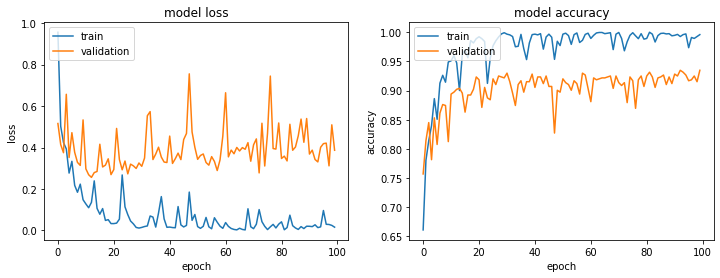

In [40]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('model loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title('model accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

plt.show()

In [41]:
model.evaluate(X_test, Y_test)

20/20 [==============================] - 0s 6ms/step - loss: 0.3867 - accuracy: 0.9347


[0.3866595923900604, 0.9347471594810486]

In [42]:
y_predicted = model.predict(X_test)

In [43]:
import pandas as pd
y_pre = []
y_tst = []
for i in range(len(y_predicted)):
  y = np.argmax(y_predicted[i])
  y_pre.append(y)
  # if Y_test[i] == 100:
  #   t_tst.append(Y_test[i])
  # if Y_test[i] == 010:
  #   t_tst.append(Y_test[i])
  # elif Y_test[i] == 001:
  #   t_tst.append(Y_test[i])
for i in range(len(Y_test)):
  y_tst.append(Y_test[i])
# y_tst

In [44]:
from sklearn.metrics import  classification_report , ConfusionMatrixDisplay
print(classification_report(y_tst, y_pre))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       140
           1       0.94      0.94      0.94       294
           2       0.96      1.00      0.98       179

    accuracy                           0.93       613
   macro avg       0.93      0.93      0.93       613
weighted avg       0.93      0.93      0.93       613



Confusion matrix:
[[117  17   6]
 [ 16 277   1]
 [  0   0 179]]


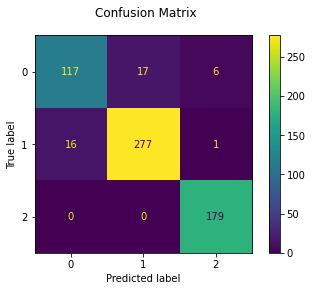

In [45]:
# import matrix from sklearn
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_tst, y_pre)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()